### Дисбаланск выборки

In [2]:
# Загрузка необходимых библиотек

import numpy as np #для матричных вычислений
import pandas as pd #для обработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений

# Устанавливаем стиль визуализаций в matplotlib
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [3]:
#Первичный анализ дата-сета
water_data = pd.read_csv('data/water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Визуализируем дисбаланс выборки

In [4]:
display(water_data['Potability'].value_counts(normalize=True)) #количество объектов класса 0 и 1 в процентах
# 61%
# 39%

0    0.60989
1    0.39011
Name: Potability, dtype: float64

<Axes: xlabel='Potability', ylabel='count'>

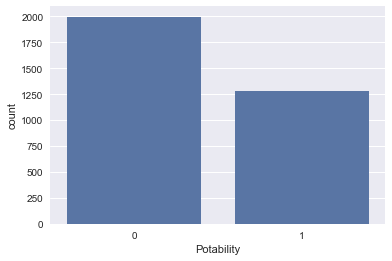

In [6]:
# визуализиреум количество объектов по классам
sns.countplot(data=water_data, x='Potability')

#### Стратифицированное разбиение

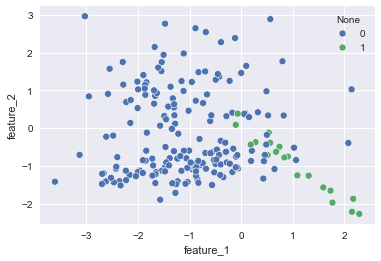

In [17]:
# генерируем датасет и произведен стратифицированное разбиение на выборки
from sklearn import datasets

X, y = datasets.make_classification(
    n_samples=200, # количество объектов в датасете
    n_features=2, #количество признаков всего в датасете
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количестов классов в датасете
    weights=[1,0.2], #пропорции классов
    random_state=40
)

X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y);

<Axes: xlabel='feature_1', ylabel='feature_2'>

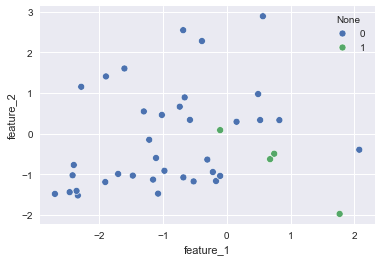

In [19]:
# Разбиваем датасет на выборки со стратификацией по y
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# визуализируем валидационную выборку X
sns.scatterplot(x=X_valid['feature_1'], y=X_valid['feature_2'], hue=y_valid)